In [31]:
import pandas as pd
import seaborn as sns
import jsonlines

repro = '..'
project = 'dev'
batch = 'm_car_qt'


# %%
# df = pd.read_parquet('../runs/heuristic_tabular/heuristic_only/metrics.parquet')
final_df = pd.read_csv(f'{repro}/runs/{project}/{batch}/data/df/qtable.4500.csv')

In [32]:
final_df2 = final_df.iloc[2:]
final_df2.columns = ['agent', 'state', 'action_1', 'action_2', 'action_3']

final_df2[['x', 'y']] = final_df2['state'].str.extract("(\d).*(\d)")
final_df2['max_action'] = final_df2[['action_1', 'action_2', 'action_3']].idxmax(axis=1)
final_df2.head()

,agent,state,action_1,action_2,action_3,x,y,max_action
2,A,"((0,), (0,))",1.000000,1.000000,1.000000,0,0,action_1
3,A,"((0,), (1,))",1.000000,-2.163500,-1.757346,0,1,action_1
4,A,"((0,), (2,))",-34.063220,-34.181520,-33.838028,0,2,action_3
5,A,"((0,), (3,))",-38.359215,-38.584557,-38.618454,0,3,action_1
6,A,"((0,), (4,))",-39.073647,-38.652570,-39.015370,0,4,action_2


<AxesSubplot:xlabel='x', ylabel='y'>

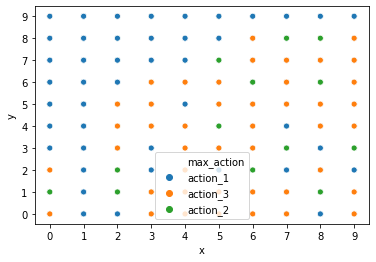

In [33]:
sns.scatterplot(x=final_df2['x'], y=final_df2['y'], hue=final_df2['max_action'])